# Classification Using Naive Bayes and Tree Based Algorithm

# Practice

In [1]:
# Importing Required Liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
#Importing dataset

df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C5_S4_Wine_Data_Practice.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#Renaming columns of dataset
df=df.rename(columns={0:'Target',1:'Alcohol',2:'Malic Acid',3:'Ash',4:'Alcalinity of ash',5:'Magnesium',6:'Total phenols',7:'Flavanoids',8:'Nonflavanoid phenols',9:'Proanthocyanins',10:'Color Intensity',11:'Hue',12:'OD280/OD315 of diluted vines',13:'Proline'})
df.head()

,Target,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted vines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data Exploration & Visualization

## Task 1.1 

In [4]:
# shape of the dataset
print('The number of samples in data is {}.'.format(df.shape[0]))
print('The number of columns in data is {}.'.format(df.shape[1]))

The number of samples in data is 178.
The number of columns in data is 14.


In [5]:
# exploring the existing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target                        178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted vines  178 non-null    float64
 13  Proli

In [6]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [7]:
# exploring the existing data types
df.dtypes

Target                            int64
Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color Intensity                 float64
Hue                             float64
OD280/OD315 of diluted vines    float64
Proline                           int64
dtype: object

## Task 1.2  

In [8]:
df['Target'].nunique()

3

### Nick wishes to descriminate three wine classes

## Task 1.3

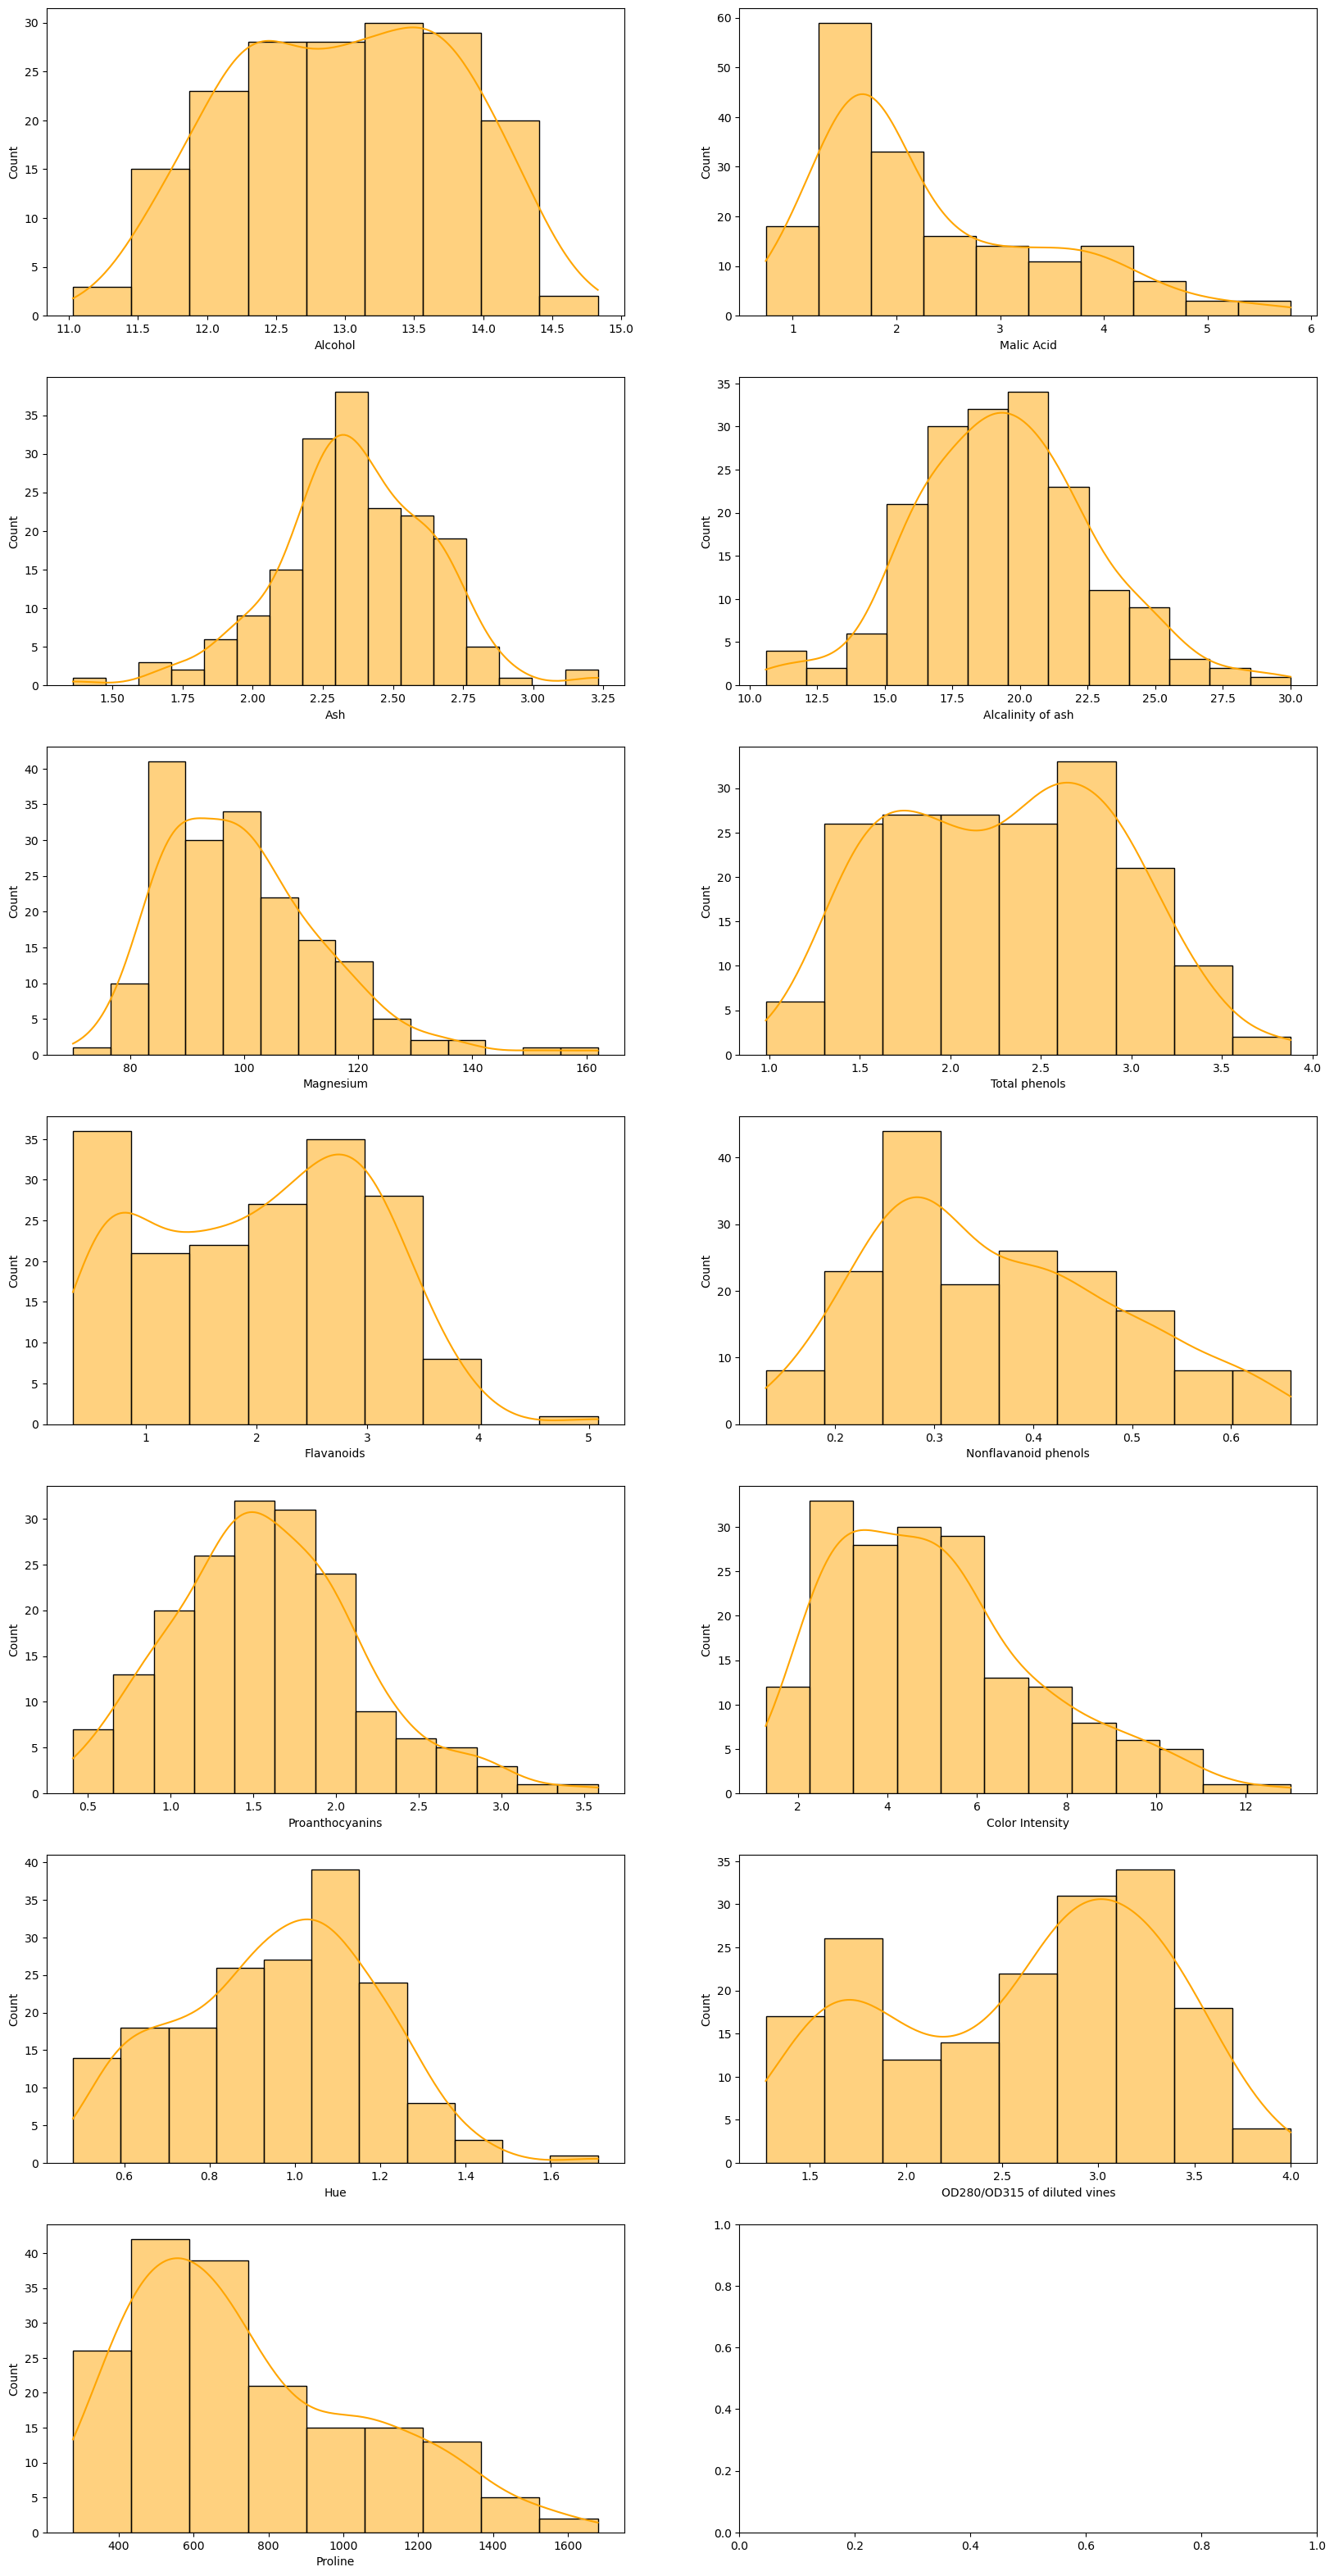

In [9]:
#Visualizing using histogram
cols=df.drop('Target',axis=1).columns
num_col=2
num_rows=int(len(cols)/2)+1
#bins=50
fig,axs=plt.subplots(nrows=num_rows,ncols=num_col,squeeze=True,figsize=(20,40))
for col,ax in zip(cols,axs.flatten()[:len(cols)]):
    sb.histplot(df[col],ax=ax,kde=True,color='orange')

### Alcalinity of ash is normally distributed

## Data Preprocessing 

## Task 2.1 

In [10]:
# checking missing values in data
df.isnull().sum()

Target                          0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of diluted vines    0
Proline                         0
dtype: int64

### No any missing value in data 

## Task 2.3 

<AxesSubplot:>

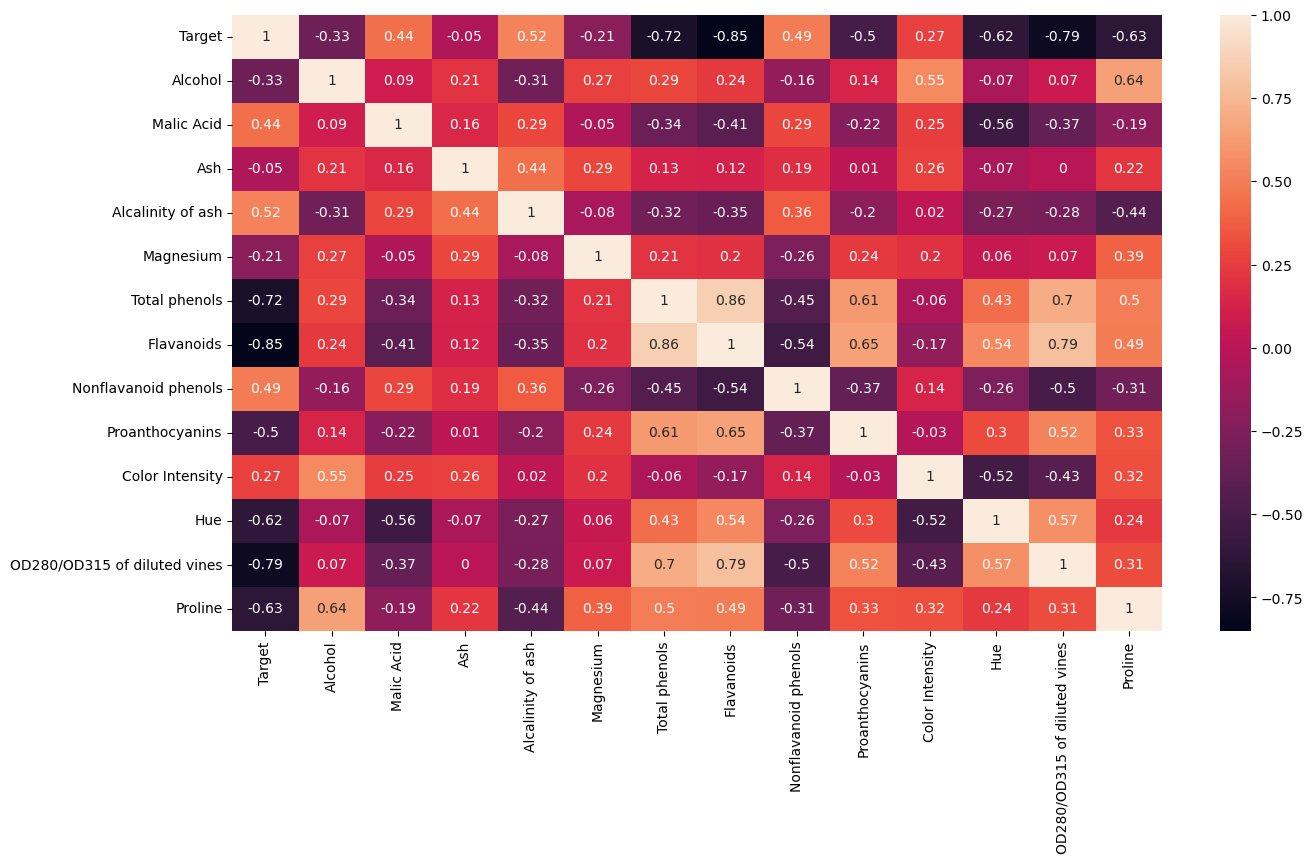

In [11]:
# Checking correlations among the data
plt.figure(figsize=(15,8))
sb.heatmap(round(df.corr(),2),annot=True)

### Alcalinity of ash has strong positive correlation and Flavanoids has strong negative correlation with Target

## Task 2.4

In [12]:
#Creating test and training datasets
x=df.drop('Target',axis=1)
y=df['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('Size of training dataset: ', x_train.shape)
print('Size of test dataset: ', x_test.shape)

Size of training dataset:  (142, 13)
Size of test dataset:  (36, 13)


## Task 2.2

In [13]:
#Scaling Training Data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## Modelling - Naive Bayes

## Task 3.1

In [14]:
#Model Building
gnm=GaussianNB()
gnm.fit(x_train,y_train)

GaussianNB()

## Task 3.2 

In [15]:
#Using the trained model to predict the outcome of the X_Test dataset
y_pred=gnm.predict(x_test)
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

[]

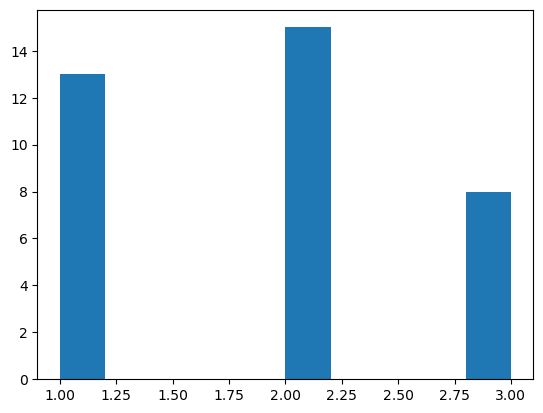

In [16]:
#Creating histogram with y_pred_prob
plt.hist(y_pred)
plt.plot()

In [17]:
#Using the trained model to predict probabilities on X_Test test data
y_pred_prob=gnm.predict_proba(x_test)
y_pred_prob

array([[9.99902156e-01, 9.78444182e-05, 1.76296027e-29],
       [9.99903136e-01, 9.68641145e-05, 2.34404947e-21],
       [1.75086930e-23, 2.38890662e-04, 9.99761109e-01],
       [9.99999943e-01, 5.74924998e-08, 5.34012419e-33],
       [3.51224797e-08, 9.99999965e-01, 3.32553710e-22],
       [1.00000000e+00, 1.96333911e-10, 3.23311267e-29],
       [7.01359080e-13, 1.00000000e+00, 6.37983933e-12],
       [4.46173334e-26, 7.51659757e-13, 1.00000000e+00],
       [2.34456701e-05, 9.99976554e-01, 5.29082764e-28],
       [2.22336157e-19, 6.25617036e-05, 9.99937438e-01],
       [9.65333249e-01, 3.46667511e-02, 4.27906473e-31],
       [2.32247056e-22, 2.37987185e-12, 1.00000000e+00],
       [4.87321102e-01, 5.12678898e-01, 1.96251590e-16],
       [4.53469013e-19, 8.78256734e-01, 1.21743266e-01],
       [1.00000000e+00, 1.91511283e-11, 4.77767893e-31],
       [1.71172451e-08, 9.99999983e-01, 1.68123440e-13],
       [7.71783997e-13, 1.00000000e+00, 8.32357392e-11],
       [1.13427795e-14, 1.00000

[]

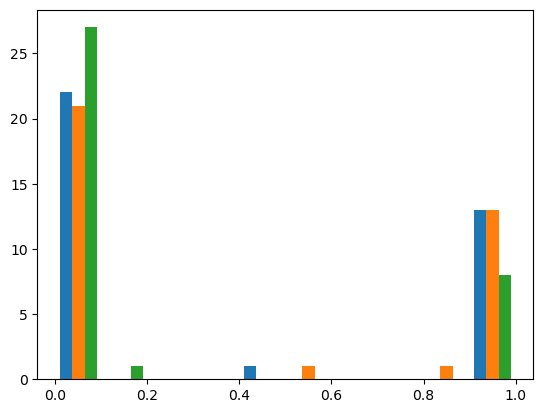

In [18]:
#Creating histogram with y_pred_prob
plt.hist(y_pred_prob)
plt.plot()

## Task 3.3 

In [19]:
#Calculating the accuracy of the training dataset
acc_train = round(gnm.score(x_train, y_train) * 100, 2)
acc_train

97.18

## Task 3.4 

In [20]:
# evalating the model on the test data
acc_test = round(gnm.score(x_test, y_test) * 100, 2)
acc_test

97.22

In [21]:
# evalating the model accuracy
metrics.accuracy_score(y_test,y_pred)*100

97.22222222222221

## Modelling - Decision Tree

## Task 4.1

In [22]:
# Create Decision Tree classifer object
clf=DecisionTreeClassifier(max_depth=3)
# Training Decision Tree Classifer
clf=clf.fit(x_train,y_train)


## Task 4.2

In [23]:
#Predicting the response for test dataset
y_pred1=clf.predict(x_test)
y_pred1

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

## Task 4.3

In [24]:
#Calculating the accuracy of the training dataset
acc_train1 = round(clf.score(x_train, y_train) * 100, 2)
acc_train1

99.3

## Task 4.4

In [25]:
# evalating the model on the test data
acc_test1 = round(clf.score(x_test, y_test) * 100, 2)
acc_test1

94.44

In [26]:
# evalating the model accuracy
metrics.accuracy_score(y_test,y_pred1)*100

94.44444444444444

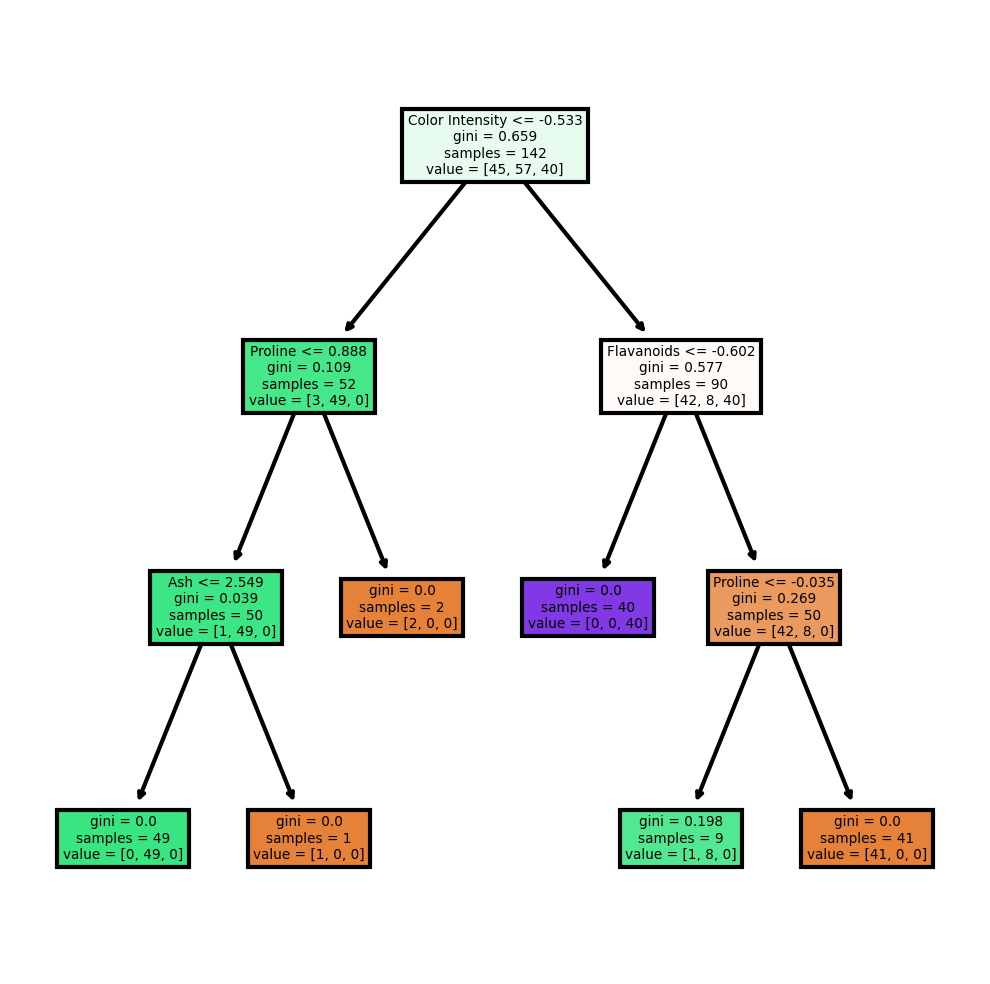

In [27]:
from sklearn import tree
# Setting dpi = 300 to make image clearer than default
feature_cols = df.drop('Target',axis=1).columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
 feature_names = feature_cols,
 filled = True);

## Choose Best Model 

## Task 5.1

In [28]:
#Evaluating performance metrics for Naive-Bays Algorithm
print('accuracy_score : ',round(accuracy_score(y_test,y_pred)*100,4))
print('precision_score : ',round(precision_score(y_test,y_pred,average='micro')*100,4))
print('f1_score : ',round(f1_score(y_test,y_pred,average='micro')*100,4))
print('recall_score : ',round(recall_score(y_test,y_pred,average='micro')*100,4))
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))

accuracy_score :  97.2222
precision_score :  97.2222
f1_score :  97.2222
recall_score :  97.2222
Confusion Matrix : 
 [[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]


In [29]:
#Evaluating performance metrics for Decision Tree Algorithm
print('accuracy_score : ',round(accuracy_score(y_test,y_pred1)*100,4))
print('precision_score : ',round(precision_score(y_test,y_pred1,average='micro')*100,4))
print('f1_score : ',round(f1_score(y_test,y_pred1,average='micro')*100,4))
print('recall_score : ',round(recall_score(y_test,y_pred1,average='micro')*100,4))
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred1))

accuracy_score :  94.4444
precision_score :  94.4444
f1_score :  94.4444
recall_score :  94.4444
Confusion Matrix : 
 [[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


## Task 5.2 

In [30]:
#Performance metrics

In [31]:
from sklearn.metrics import classification_report
print('Naive Bayes Classification Report \n',classification_report(y_test,y_pred))

Naive Bayes Classification Report 
               precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [32]:
from sklearn.metrics import classification_report
print('Decision Tree Classification Report \n',classification_report(y_test,y_pred1))

Decision Tree Classification Report 
               precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### Accuracy of Naive-Bayes ALgorithm is higher than Decision Tree Algorithm. Nick can use Naive-Bayes Algorithm to classify future produced wine samples